# Assessment 2

In [28]:
# import dataset from drive
!gdown --id 1znM9w3_lZ6NzGhY4NoznfGBuPm29T_Q5

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1znM9w3_lZ6NzGhY4NoznfGBuPm29T_Q5
To: /content/stock_market_dataset.csv
100% 14.4M/14.4M [00:00<00:00, 32.3MB/s]


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Import Dataset
st = pd.read_csv('stock_market_dataset.csv')

### 1. Are there missing values in the dataset?

In [31]:
st.isnull().sum()

,0
Stock,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
SMA_10,0
RSI,0
MACD,0


--> The dataset has no missing values.

### 2. What is the data type of each column?

In [32]:
st.dtypes

,0
Stock,object
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
SMA_10,float64
RSI,float64
MACD,float64


--> The Date column is an object

--> Most of the other columns, including Open, High, Low, Close, SMA_10, RSI, MACD, Bollinger_Upper, Bollinger_Lower, GDP_Growth, Inflation_Rate, Interest_Rate, Sentiment_Score, and Next_Close, are of type is float

--> Volume and Target columns type is int

### 3. Convert Date to datetime format.

In [33]:
st['Date'] = pd.to_datetime(st['Date'])

### 4. Check for duplicate rows.

In [34]:
st.duplicated().sum()

np.int64(0)

--> There are no duplicate rows.

### 5. Check the range of RSI (Relative Strength Index).

In [35]:
print(st['RSI'].min())
print(st['RSI'].max())


10.000910691042568
89.99970361452127


--> The RSI values range from 10 to 90.

### 6.  Verify if Next_Close corresponds to the next day’s Close.

In [36]:
print((st['Next_Close'] == st.sort_values(['Stock', 'Date']).groupby('Stock')['Close'].shift(-1)).all())


False


--> Next_Close does not match the next day’s Close.

### 7. Check if any column has constant value.

In [37]:
st.columns[st.nunique() == 1]

Index([], dtype='object')

--> No column has a constant value.

### 8. Check if 'Target' only has 0s and 1s.

In [38]:
print(st['Target'].isin([0,1]).all())

True


--> Target only contains 0s and 1s, which is correct.

### 9.  Are there outliers in Volume?

In [39]:
Q1 = st['Volume'].quantile(0.25)
Q3 = st['Volume'].quantile(0.75)

IQR = Q3 - Q1

minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR

print(f'Minimum Volume {minimum}')
print(f'Maximum Volume {maximum}')


Minimum Volume -2348817.5
Maximum Volume 7437946.5


--> There are outliers in the Volume column.

### 10. Check Correlation Matrix

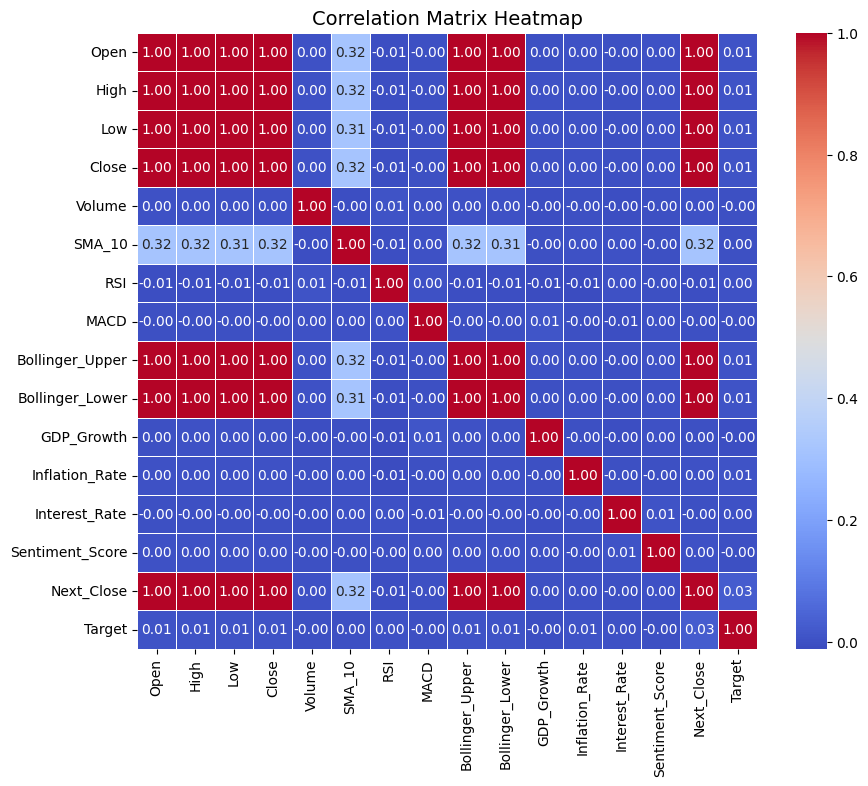

In [40]:
corr_matrix = st.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5,linecolor="white")
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()



--> The strongest correlations are likely between Close, Open, High, Low, and SMA_10, they are all related to stock prices.

### 11. Are there negative values in Close, Open, MACD, etc.?

In [41]:
cols = st[['Close','Open','MACD']]
print((cols < 0).any())

Close    False
Open     False
MACD      True
dtype: bool


--> Close and Open do not have negative values, but MACD does.

### 12. Check for abrupt spikes in Interest Rate.

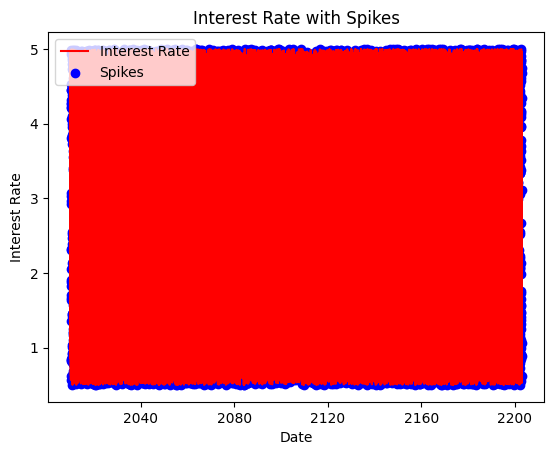

In [42]:

st['IR_Change'] = st['Interest_Rate'].diff()
spikes = st[st['IR_Change'].abs() > 2]
plt.plot(st['Date'],st['Interest_Rate'],color='red',label='Interest Rate')
plt.scatter(spikes['Date'],spikes['Interest_Rate'],color='blue',label='Spikes')
plt.title('Interest Rate with Spikes')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.legend(loc='upper left')
plt.show()


--> Interest Rate shows sudden large changes on some days.

### 13. Do Boilliger bands make sense?


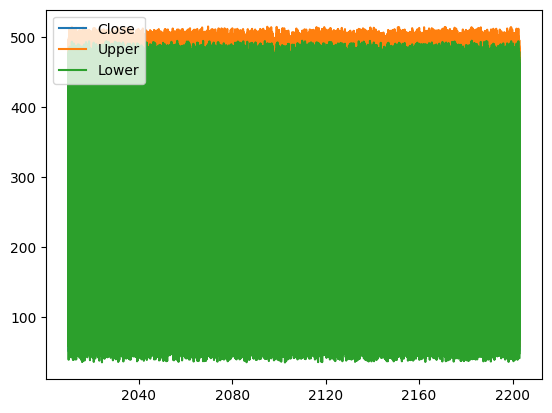

In [43]:
plt.plot(st['Date'],st['Close'],label='Close')
plt.plot(st['Date'],st['Bollinger_Upper'],label='Upper')
plt.plot(st['Date'],st['Bollinger_Lower'],label='Lower')
plt.legend()

--> Close mostly stays within Bollinger Bands; bands widen during high volatility and narrow during low volatility.

### 14. Is Sentiment_Score standardized (between -1 and 1)?

In [44]:
print(st['Sentiment_Score'].min())
print(st['Sentiment_Score'].max())


-0.9999212930740472
0.9999661752348248


--> Sentiment_Score is standardized between roughly -1 and 1.

### 15. What is the Avrage Trading volume?

In [45]:
st['Volume'].mean()

np.float64(2547134.0776579473)

--> Average trading volume is about 2,547,134.

### 16. What % of data has RSI > 70 (overbought zone)?

In [46]:
over = ((st[st['RSI'] > 70].shape[0] / st.shape[0]) * 100)
print(int(over))

24


--> Around 24% of RSI values are over 70.

### 17. Check for monotonic date squeances.

In [47]:

st['Date'].is_monotonic_increasing


False

In [48]:
st['Date'].is_monotonic_decreasing

False

--> Dates are in order but not fully consecutive due to weekends, holidays, or gaps.


### 18. Detect anomalies using Z-Score.

In [49]:
z_scores = (st['Close'] - st['Close'].mean()) / st['Close'].std()
anomalies = st[np.abs(z_scores) > 3]
print(anomalies[['Date', 'Close']])

Empty DataFrame
Columns: [Date, Close]
Index: []


--> No anomalies detected in Close price using Z-Score with a threshold of 3.

### 19. Are the dates consecutive trading days (excluding weekends/holidays)?

In [50]:
(st['Date'].diff().dt.days > 3).any()


np.True_

--> The dataset’s dates are not fully consecutive, with gaps of more than three days, likely due to holidays, weekends, or missing data.

### 20. Are any Open, Close, High, or Low values zero or negative?

In [51]:

cols = ['Open', 'Close', 'High', 'Low']
st[cols].describe()


,Open,Close,High,Low
count,50349.000000,50349.000000,50349.000000,50349.000000
mean,274.949818,274.924734,281.765893,268.061694
std,129.861782,129.786177,133.040144,126.627094
min,49.106664,50.078817,50.227411,47.755292
25%,162.088317,162.105889,166.265621,158.015601
50%,274.928366,275.005601,281.961442,268.121257
75%,386.653578,386.636207,396.218846,376.748125
max,509.361090,499.962629,524.861970,499.339660


--> Open, Close, High, and Low values are never zero or negative.

## Summary

--> Close and Open are always positive, MACD can be negative.

--> RSI ranges from 10 to 90, with about 24% above 70.

--> Average trading volume is around 2.5 million, but there are some outliers.

--> Interest Rate shows occasional sudden jumps.

--> Close mostly stays within Bollinger Bands, which widen in volatile periods.

--> Sentiment_Score ranges roughly from -1 to 1.

--> Strong correlations between Close, Open, High, Low, and SMA_10.

--> Dates are in order but have gaps due to weekends, holidays, or missing data.

## Insightful Analysis Questions

### 1. What’s the average closing price over the dataset?

In [52]:
st['Close'].mean()

np.float64(274.9247340109256)

--> The average closing price is 274.94.

### 2. Which technical indicator has the highest correlation with Target?

In [53]:
num = st.select_dtypes(include='number')
corr = num.corr()['Target'].drop('Target')
print(corr.idxmax())

Next_Close


--> The Next_Close column has the strongest correlation with the Target.

### 3. Is RSI > 70 usually followed by a drop (Target = 0)?

In [54]:

high_rsi = st[st['RSI'] > 70]
dp = (high_rsi['Target'] == 0).mean() * 100
print(dp)


49.71986553545702


--> When RSI > 70, there’s about a 49.71% chance the stock drops.

### 4. Do high sentiment scores (> 0.5) predict upward movement?


In [55]:
score = st[st['Sentiment_Score'] > 0.5]
mov = (score['Target']==1).mean() * 100
print(mov)

49.90058060924203


--> High Sentiment_Scores predicts upward movement about 50%.

### 5. How does GDP growth affect stock movement?

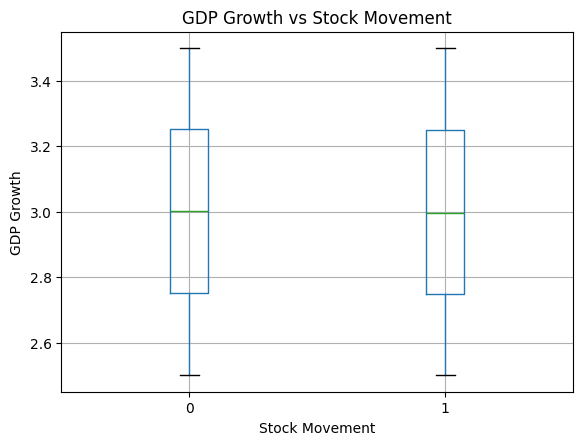

In [56]:

st.boxplot(column='GDP_Growth', by='Target')
plt.xlabel('Stock Movement')
plt.ylabel('GDP Growth')
plt.title('GDP Growth vs Stock Movement')
plt.suptitle('')
plt.show()


--> Higher GDP growth slightly increases the chance of stock rises

### 6. What is the average return when MACD > 0?

In [57]:
con = st[st['MACD'] > 0]
ret = (con['Next_Close'] - con['Close']).mean()
print(ret)

0.010591823320566855


--> When MACD > 0 the average return is 0.0105

### 7. What is the win rate (Target=1 %) overall?

In [58]:
(st['Target'] == 1).mean() * 100

np.float64(50.19762060815508)

--> The overall win rate is around 50%

### 8. How accurate would a naive “buy every day” model be?

In [59]:
(st['Target'] == 1).mean() * 100

np.float64(50.19762060815508)

### 9. What does Bollinger Band compression indicate?

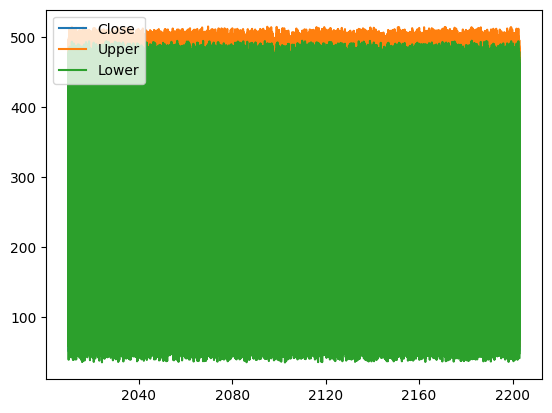

In [60]:
plt.plot(st['Date'], st['Close'], label='Close')
plt.plot(st['Date'], st['Bollinger_Upper'],label='Upper')
plt.plot(st['Date'], st['Bollinger_Lower'],label='Lower')
plt.legend()
plt.show()


--> When the Bollinger Bands squeeze together, it means the price isn’t moving much, but a big price move could happen soon. The direction of that move is not clear.

### 10. Does low volume relate to price drops(Target=0)?

In [61]:
low_volume = st['Volume'] < st['Volume'].quantile(0.2)

(st[low_volume]['Target'] == 0).mean() * 100


np.float64(49.50347567030784)

--> Low volume only slightly relates to price drops 49.50%.

### 11. Plot rolling mean vs price

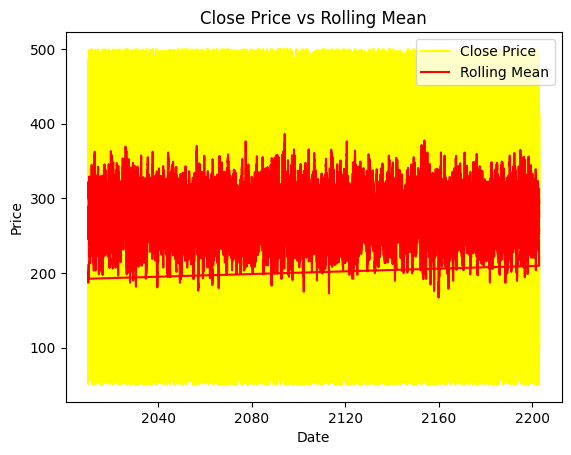

In [62]:

st['Rolling_Mean'] = st['Close'].rolling(window=20).mean()

plt.plot(st['Date'], st['Close'], label='Close Price',color='yellow')
plt.plot(st['Date'], st['Rolling_Mean'], label='Rolling Mean',color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price vs Rolling Mean')
plt.legend(loc='upper right')
plt.show()



--> The chart shows the stock’s daily Close Price in yellow and its 20-day average in red, making it easy to see short-term price changes compared to the overall trend.

### 12. What % of up days occur with MACD > 0 and RSI < 70?

In [63]:
condition = (st['MACD'] > 0) & (st['RSI'] < 70)

(st[condition]['Target'] == 1).mean() * 100

np.float64(50.0764646944049)

--> Total 50% of up days occur with MACD > 0 and RSI < 70.

### 13. How much profit could be made using Target 1 strategy?

In [64]:
(st[st['Target'] == 1]['Next_Close'] - st[st['Target'] == 1]['Close']).sum()



np.float64(69927.2345850823)

--> Using a Target = 1 strategy, the potential profit is 69,927.

### 14. Does lower interest rate lead to stock rise(Target=1)?

In [65]:
low_ir = st['Interest_Rate'] < st['Interest_Rate'].median()
(st[low_ir]['Target'] == 1).mean() * 100

np.float64(50.135059982521646)

--> Lower interest rates lead to stock rises about 50% of the time, so there’s no clear effect.

## Summary

--> The average closing price is 274.94.

--> Next_Close column has the strongest correlation with the Target.

--> When RSI > 70, the stock drops about 50% of the time.

--> High Sentiment_Scores only a little bit show that the stock might go up.

--> Higher GDP growth slightly increases the chance of stock rises.

--> When MACD > 0, the average return is 0.0105, and 50% of up days occur with MACD > 0 and RSI < 70.

--> Bollinger Bands squeezing means low price swings and a possible upcoming move, direction unknown.

--> Low volume has little effect on price drops.

--> Using a Target = 1 strategy, potential profit is 69,927.

--> Lower interest rates show no clear effect on stock rises.

## Conclusion

--> Close and Open are always positive and MACD can be negative.

--> RSI is mostly between 10 and 90, with about 24% above 70, giving only a 50% chance of a drop.

--> Interest Rate sometimes jumps suddenly, but lower rates don’t clearly affect stock rises.

--> Close mostly stays within Bollinger Bands when the bands squeeze, it signals a possible upcoming price move, but the direction is uncertain.

--> Strong correlations exist between Close, Open, High, Low, and SMA_10.

--> Higher GDP growth slightly increases the chance of stock rises.

--> When MACD > 0, average returns are positive 0.0105, and about 50% of up days happen with MACD > 0 and RSI < 70.

--> Using a Target = 1 strategy, potential profit is 69,927.

--> Average closing price is 274.94.